In [441]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import re
from nltk import WordNetLemmatizer

In [442]:
df = pd.read_csv('D:/Self studying/NLP/LinkedIn/Essential Training NLP/archive/SMSSpamCollection.tsv', header=None, sep='\t')

In [443]:
df.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [444]:
df.columns = ['label', 'text']

In [445]:
df.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Remove Punctuations

In [446]:
def remove_punctuations(text):
    text = text.lower()
    temp = ''.join([i for i in text if i not in string.punctuation])
    return temp

In [447]:
df['text_punc'] = df['text'].apply(lambda x: remove_punctuations(x))

In [448]:
df.head()

,label,text,text_punc
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will


## Tokenize

In [449]:
def tokenize(text):
    temp = re.split('\W+', text)
    return temp

In [450]:
df['text_tokenized'] = df['text_punc'].apply(lambda x: tokenize(x))

In [451]:
df.head()

,label,text,text_punc,text_tokenized
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"


## Remove Stop Words

In [452]:
def remove_stopwords(text):
    sw = stopwords.words('english')
    temp = [i for i in text if i not in sw]
    return temp

In [453]:
df['text_nonSW'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [454]:
df.head()

,label,text,text_punc,text_tokenized,text_nonSW
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Lemmatize

In [455]:
wn = WordNetLemmatizer()
def Lemmatizing(text):
    temp = [wn.lemmatize(i) for i in text]
    return temp

In [456]:
df['text_lemmatized'] = df['text_nonSW'].apply(lambda x: Lemmatizing(x))

In [457]:
df.head()

,label,text,text_punc,text_tokenized,text_nonSW,text_lemmatized
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


In [458]:
def arr_to_str(text):
    temp = ' '.join([i for i in text])
    return temp

In [459]:
df['clean_text'] = df['text_lemmatized'].apply(lambda x: arr_to_str(x))

In [460]:
df.head()

,label,text,text_punc,text_tokenized,text_nonSW,text_lemmatized,clean_text
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...",ive searching right word thank breather promis...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",date sunday


## TF - IDF Vectorize

In [473]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [474]:
tf_idf_vec = TfidfVectorizer()

In [475]:
x_Tf_idf = tf_idf_vec.fit_transform(df['clean_text'])

In [476]:
df_Tf_idf = pd.DataFrame(x_Tf_idf.toarray())

In [477]:
df_Tf_idf.columns = tf_idf_vec.get_feature_names()

In [539]:
df_Tf_idf.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [540]:
df_Tf_idf = pd.concat([df['len_text'], df['punc_per'],df_Tf_idf], axis=1)

## Feature Engineering

In [479]:
df.head()

,label,text,text_punc,text_tokenized,text_nonSW,text_lemmatized,clean_text
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...",ive searching right word thank breather promis...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",date sunday


In [480]:
df['len_text'] = df['text'].apply(lambda x: len(x) - x.count(" "))

In [504]:
def percentage_of_punc(text):
    temp = sum([1 for i in text if i in string.punctuation])
    return round(temp/(len(text)- text.count(' ') )*100, 2)

In [505]:
df['punc_per'] = df['text'].apply(lambda x: percentage_of_punc(x))

In [506]:
df.head()

,label,text,text_punc,text_tokenized,text_nonSW,text_lemmatized,clean_text,len_text,punc_per
0,ham,I've been searching for the right words to tha...,ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, searching, right, word, thank, breather,...",ive searching right word thank breather promis...,160,2.50
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,128,4.69
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though,49,4.08
3,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...",even brother like speak treat like aid patent,62,3.23
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]",date sunday,28,7.14


In [517]:
import matplotlib.pyplot as plt
import numpy as np 

C:\Users\bedoe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


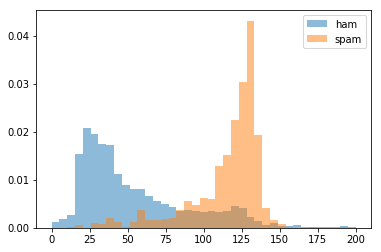

In [532]:
bins = np.linspace(0,200,40)
plt.hist(df[df['label'] == 'ham']['len_text'], bins=bins, label='ham', alpha = 0.5, normed=True)
plt.hist(df[df['label'] == 'spam']['len_text'], bins=bins, label='spam', alpha = 0.5, normed=True)
plt.legend()
plt.show()

C:\Users\bedoe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


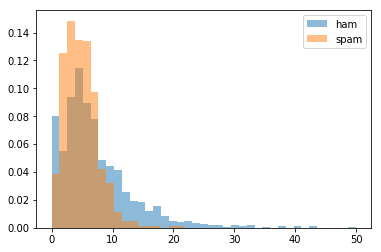

In [533]:
bins = np.linspace(0,50,40)
plt.hist(df[df['label'] == 'ham']['punc_per'], bins=bins, label='ham', alpha = 0.5, normed=True)
plt.hist(df[df['label'] == 'spam']['punc_per'], bins=bins, label='spam', alpha = 0.5, normed=True)
plt.legend()
plt.show()

## RandomForestClassifier

In [534]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

In [542]:
cls = RandomForestClassifier()
k_fold = KFold(n_splits=5)
cross_val_score(cls, df_Tf_idf, df['label'], cv=k_fold, scoring='accuracy')

array([0.97396768, 0.97755835, 0.97396768, 0.95867026, 0.97394429])